# Regresión lineal
***

* Un modelo de regresión lineal es **interpretable**, ya que los pesos del modelo indican cómo contribuye cada variable en la predicción realizada por el modelo.
* Al aumentar el valor de una variable continua en una unidad cambia la salida según el peso asociado a esa variable
* En variables categóricas → se transforman en múltiples variables (*One Hot Encoding*) → variables binarias → la variable que esté “activada” (valor 1) es la que contribuye (con el peso) a la predicción)
* Intercepto: representa el valor medio de la predicción del modelo cuando todas las variables independientes tienen valor  es cero (poco frecuente en problemas reales)

Más sobre regresión lineal [acá](https://github.com/rpezoa/ML_Aplicado/blob/master/clases/01_Introduccion_Regresion_Lineal.ipynb)


## Bibliotecas

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

## Ejemplo 1
(didáctico)
***

## Datos

In [7]:
# Datos de presión arterial
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9,
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114,
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217]
x = np.asarray(x, np.float32)
y = np.asarray(y, np.float32)

## Generación del modelo lineal y predicción
***
Se usa el método LinearRegression de sklearn

In [10]:
model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))


## Gráfico

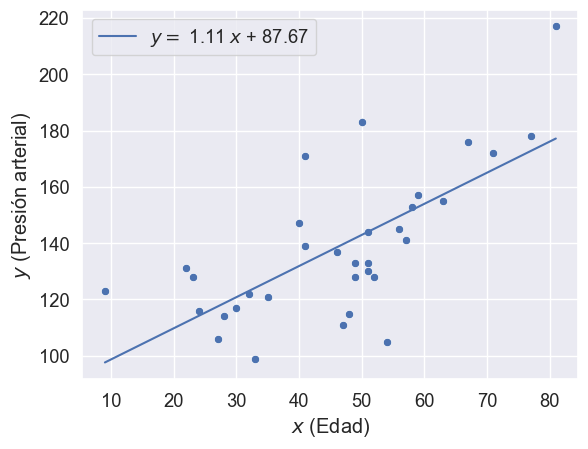

intercepto =  87.67143 pendiente =  1.1050216


In [13]:
plt.figure()
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
sns.lineplot(x=x, y = predictions, label="$y=$ "+ str(round(res.coef_[0],2))
             +" $x$ + "+str(round(res.intercept_,2)))
plt.legend()
plt.xlabel("$x$ (Edad)")
plt.ylabel("$y$ (Presión arterial) ")
sns.scatterplot( x=x, y=y)
plt.show()

print("intercepto = ",res.intercept_,"pendiente = ", res.coef_[0],)

En este modelo simple de regressión líneal: $y = \beta_1 x + \beta_0$ es fácil interpretar como la variable númerica $x$ correspondiente a la edad, afecta en la salida del modelo.

El peso $\beta_1 = 1.11 $ que pondera el valor de $x$

$y = 1.11 x + 87.67$

En este caso el peso $\beta_1 = 1.11 $ indica la contribución de la variable $x$ (edad del paciente) en la predicción de la presión arterial.

## Ejemplo 2:
***

* **Usando statsmodel, predecir el ancho del pétalo a partir de el largo del pétalo para la espcecie "Iris-versicolor"**

## Biblioteca

In [18]:
import statsmodels.formula.api as smf

## Descarga de datos y pre-procesamiento
***
* Iris Dataset


In [21]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(csv_url, header = None)

In [22]:
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
iris =  pd.read_csv(csv_url, names = col_names)

In [23]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Seleccionamos solo la clase "Iris-versicolor"

In [27]:
versicolor = iris[iris["Species"] == "Iris-versicolor"]

versicolor.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


### Ejercicio 1

<div class="alert-success">

<ol>
    <li>Generar un scatter plot de la variable independiente versus la variable dependiente</li>
    <li>Usar el método "ordinary least square (ols) de stastmodel para generar un modelo de regresión lineal". </li>
      <ol>
      <li> Usar smf.ols("Petal_Width ~ Petal_Length", data=versicolor).</li>
      <li> El lado izquierdo (~) representa la variable dependiente (lo que queremos predecir). </li>
      <li> El lado derecho contiene las variables independientes (predictoras).</li>
      </ol>
    <li>Mostrar parámetros del modelo y estadísticos (tabla resumen) </li>
    <li>Agregar al scatter plot la curva de ajuste lineal </li>
</ol>
</div>

<div class="alert-success">
1. Generar un scatter plot de la variable independiente versus la variable dependiente.
</div>

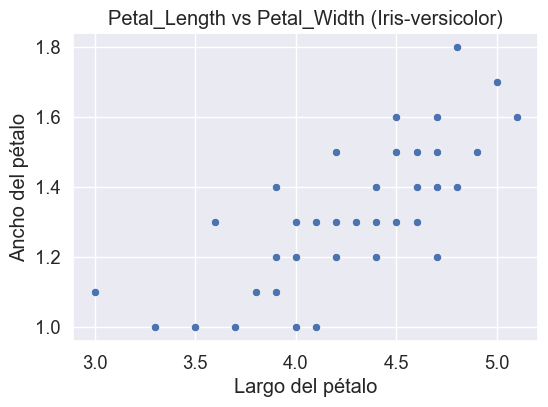

In [75]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Petal_Length",y="Petal_Width",data=versicolor)
plt.title("Petal_Length vs Petal_Width (Iris-versicolor)")
plt.xlabel("Largo del pétalo")
plt.ylabel("Ancho del pétalo")
plt.show()

<div class="alert-success">
2. Usar el metodo "ordinary least square (ols) de stastmodel para generar la regresión lineal"
</div>

In [77]:
modelo = smf.ols("Petal_Width ~ Petal_Length", data=versicolor).fit()

<div class="alert-success">
3. Mostrar parámetros del modelo y estadísticos (tabla resumen)
</div>

In [79]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Petal_Width   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     77.93
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           1.27e-11
Time:                        16:02:25   Log-Likelihood:                 34.709
No. Observations:                  50   AIC:                            -65.42
Df Residuals:                      48   BIC:                            -61.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0843      0.161     -0.525      0.602      -0.407       0.239
Petal_Length     0.3311      0.038      8.828      0.000       0.256       0.406
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   2.412
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.002
Skew:                          -0.012   Prob(JB):                        0.999
Kurtosis:                       3.017   Cond. No.                         41.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert-success">
4. Agregar al scatter plot la curva de ajuste lineal
</div>

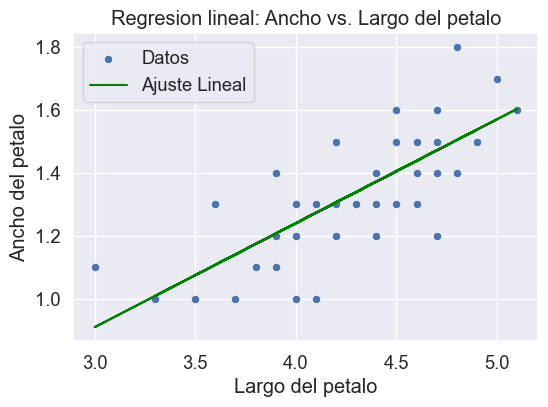

In [97]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Petal_Length",y="Petal_Width",data=versicolor, label="Datos")
x_vals = versicolor["Petal_Length"]
y_pred = modelo.predict(versicolor) #predecimos valores
plt.plot(x_vals, y_pred, color="green", label="Ajuste Lineal") #agrega linea al grafico
plt.title("Regresion lineal: Ancho vs. Largo del petalo")
plt.xlabel("Largo del petalo")
plt.ylabel("Ancho del petalo")
plt.legend()
plt.show()

### Ejercicio 2


<div class="alert-success">
    Ahora considerar todas las variables independientes disponibles para generar la regresión lineal
    <ol>
        <li>Usar el método "ordinary least square (ols) de stastmodel para generar la regresión lineal"</li>
        <li>Mostrar parámetros del modelo y estadísticos (tabla resumen) </li>
        <li>Generar gráficos usando plot_regress_exog </li>
</ol>
</div>

<div class="alert-success">
1. Usar el método "ordinary least square (ols) de stastmodel para generar la regresión lineal
</div>    

In [99]:
modelo_mult = smf.ols("Petal_Width ~ Sepal_Length + Sepal_Width + Petal_Length", data=versicolor).fit()

<div class="alert-success">
2. Mostrar parámetros del modelo y estadísticos (tabla resumen)
</div>

In [105]:
modelo_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Petal_Width   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     36.98
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           2.57e-12
Time:                        16:08:06   Log-Likelihood:                 41.276
No. Observations:                  50   AIC:                            -74.55
Df Residuals:                      46   BIC:                            -66.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1686      0.189     -0.890      0.378      -0.550       0.213
Sepal_Length    -0.0740      0.047     -1.560      0.126      -0.169       0.021
Sepal_Width      0.2233      0.062      3.609      0.001       0.099       0.348
Petal_Length     0.3088      0.053      5.771      0.000       0.201       0.416
==============================================================================
Omnibus:                        1.004   Durbin-Watson:                   2.461
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.409
Skew:                          -0.175   Prob(JB):                        0.815
Kurtosis:                       3.272   Cond. No.                         97.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert-success">
3. Generar gráficos usando plot_regress_exog
</div>

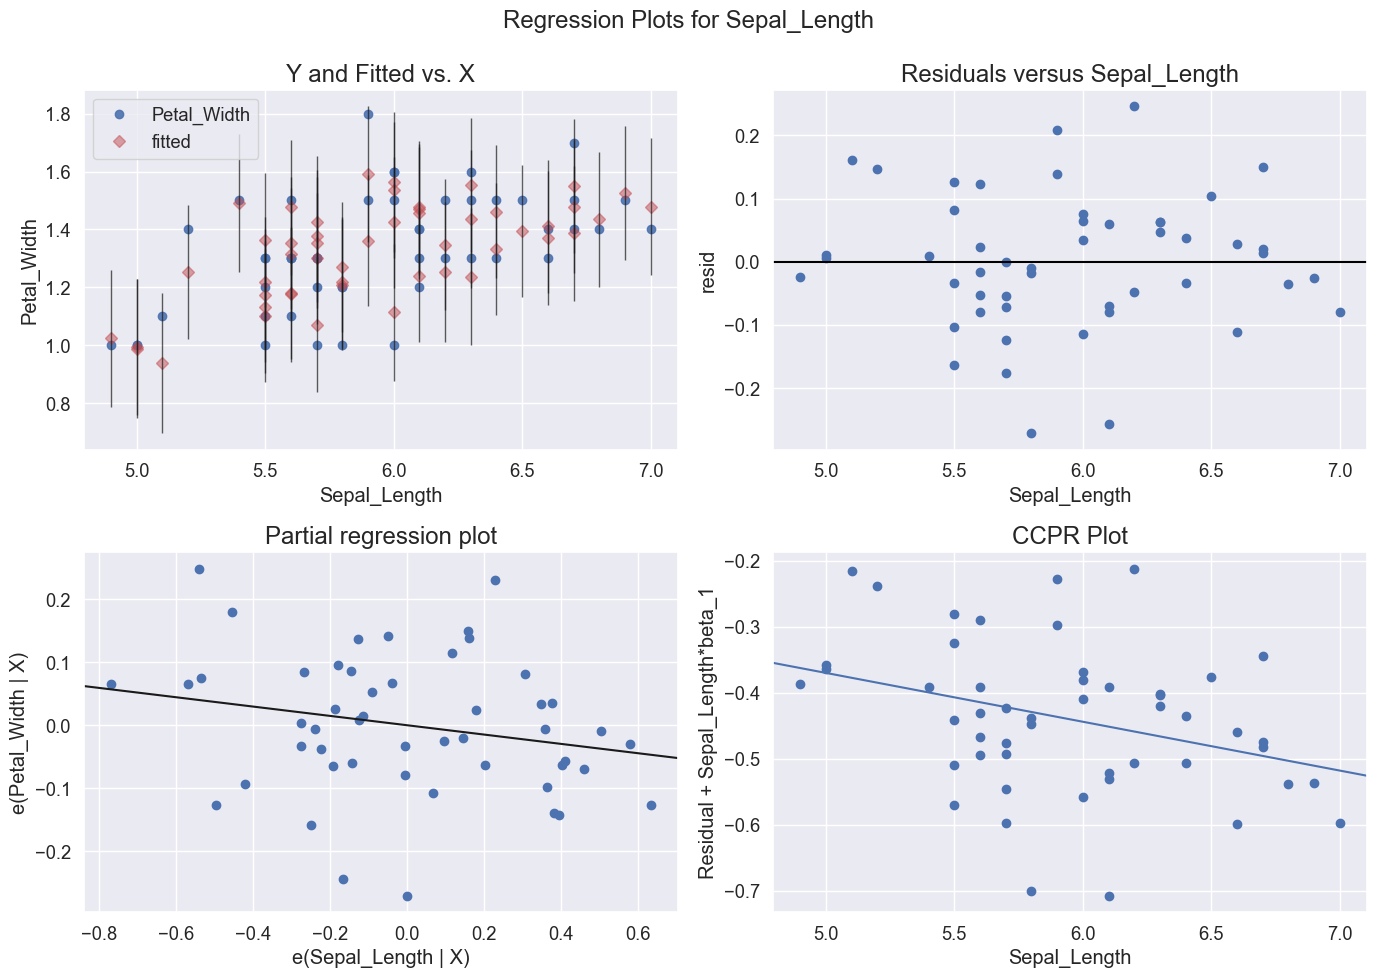

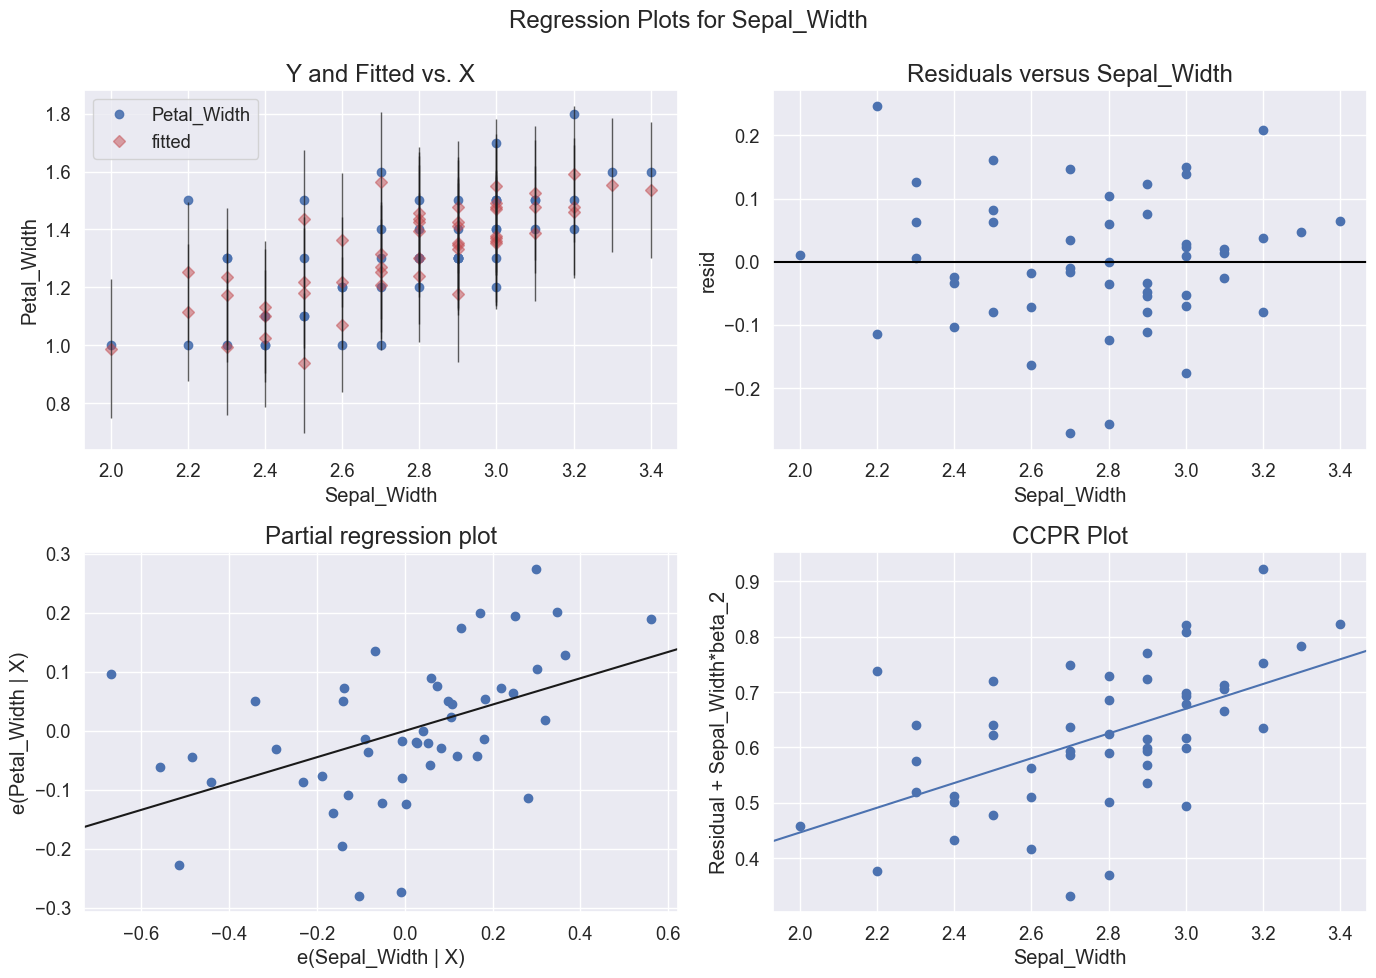

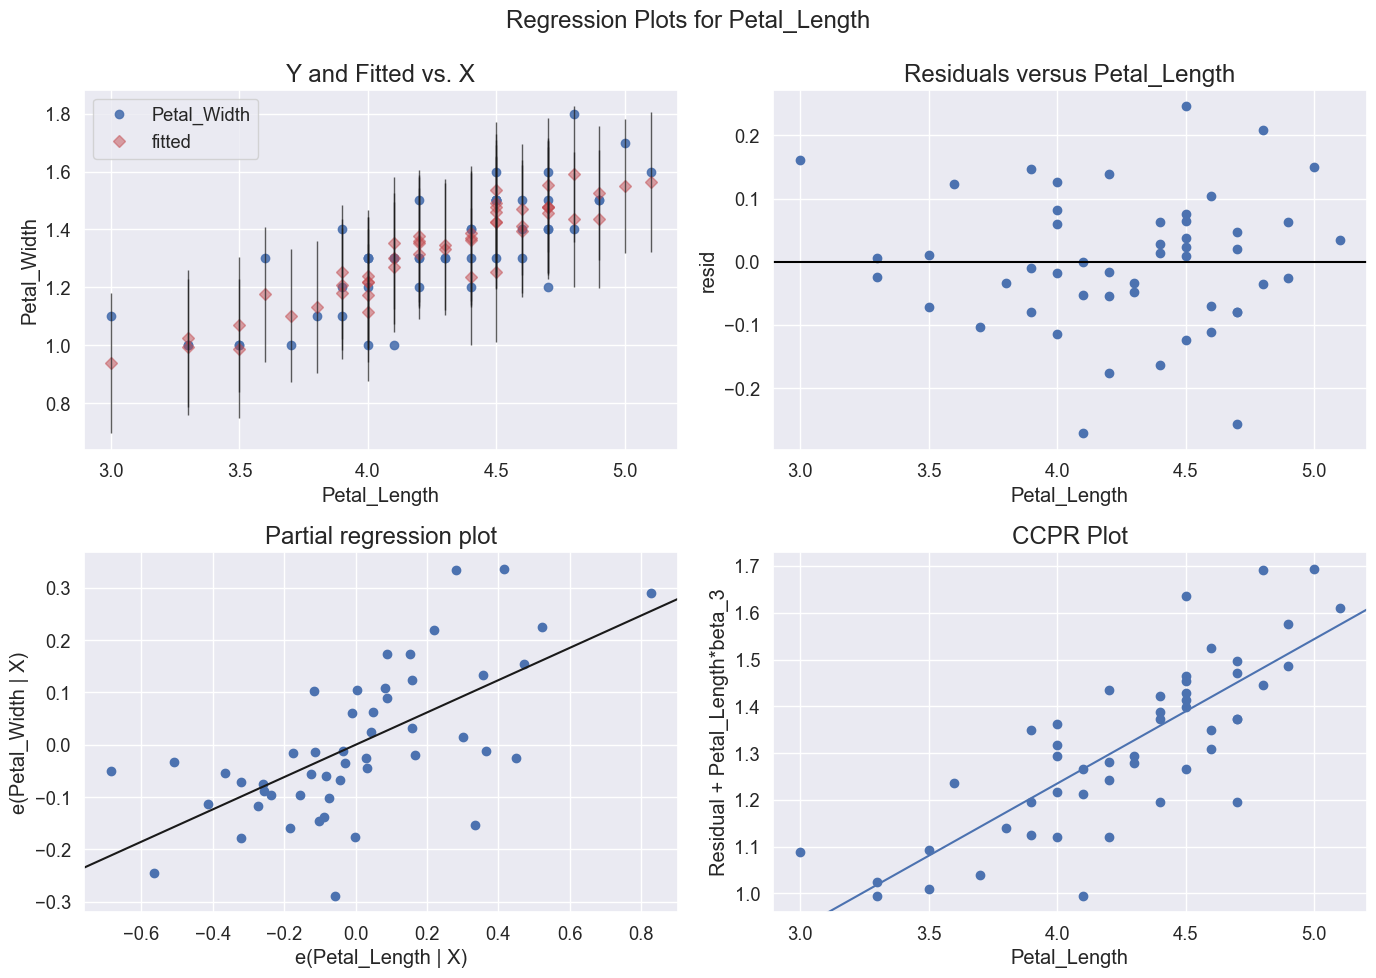

In [118]:
for x in ["Sepal_Length", "Sepal_Width", "Petal_Length"]:
    fig = plt.figure(figsize=(14,10))
    sm.graphics.plot_regress_exog(modelo_mult,x,fig=fig)
    plt.savefig('grafico.png')
    plt.show()

